In [1]:
# Load data, filter NAs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
os.listdir()
os.getcwd()
os.chdir('C:\\Users\\THIEN\\Downloads')
with open('acumen_project_data.csv', newline='') as csvfile:
    df = csv.reader(csvfile, delimiter=' ',quotechar='|')
    df = pd.read_csv(csvfile, header=0)
    df = df.fillna(' ')

print(df)

       Observation Number  Quarter  Employee Id Sex (Male=1) Race  Age  \
0                       1        1            1            0    3   27   
1                       2        2            1            0    3   28   
2                       3        3            1            0    3   28   
3                       4        4            1            0    3   28   
4                       5        5            1            0    3   29   
...                   ...      ...          ...          ...  ...  ...   
19098               19099        8         2000                 1   28   
19099               19100        9         2000                 1   28   
19100               19101       10         2000                 1   28   
19101               19102       11         2000                 1   28   
19102               19103       12         2000                 1   29   

       Hospital Visit This Quarter (1=Yes)   Salary  Health Score  
0                                        0 

In [2]:
#check to see if all NAs were cleared
df.isnull().values.any()

False

In [3]:
#inspect data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19103 entries, 0 to 19102
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Observation Number                   19103 non-null  int64  
 1   Quarter                              19103 non-null  int64  
 2   Employee Id                          19103 non-null  int64  
 3   Sex (Male=1)                         19103 non-null  object 
 4   Race                                 19103 non-null  object 
 5   Age                                  19103 non-null  int64  
 6   Hospital Visit This Quarter (1=Yes)  19103 non-null  int64  
 7   Salary                               19103 non-null  object 
 8   Health Score                         19103 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.3+ MB


,Observation Number,Quarter,Employee Id,Age,Hospital Visit This Quarter (1=Yes),Health Score
count,19103.000000,19103.000000,19103.000000,19103.000000,19103.000000,19103.000000
mean,9552.000000,7.342826,998.012249,30.592263,0.111448,3.588379
std,5514.705432,3.166792,577.313902,7.018862,0.314695,1.985285
min,1.000000,1.000000,1.000000,7.000000,0.000000,0.600000
25%,4776.500000,5.000000,498.000000,26.000000,0.000000,2.400000
50%,9552.000000,8.000000,996.000000,29.000000,0.000000,3.100000
75%,14327.500000,10.000000,1498.000000,32.000000,0.000000,4.100000
max,19103.000000,12.000000,2000.000000,172.000000,1.000000,10.000000


In [4]:
df.groupby('Quarter').size()

Quarter
1      684
2      891
3     1139
4     1448
5     1671
6     1775
7     1850
8     1885
9     1914
10    1934
11    1950
12    1962
dtype: int64

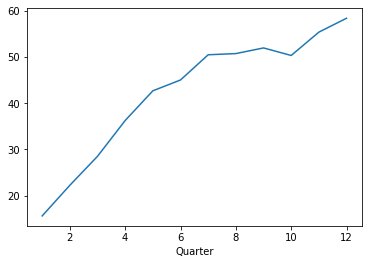

In [5]:
#create a data frame of those with Health Score above 3
sick =df[df['Health Score'] >3 ]
#group that by quarter
#count the unique employee id within that data frame
sick_count_by_qt = sick.groupby('Quarter').size()
#Calculate ratio of people getting sick by quarter
total_employees=len(df['Employee Id'].unique())
sick_progression=sick_count_by_qt/total_employees *100
sick_progression.plot.line()

Quarter
1    19.266055
2    23.190622
3    29.561672
4    37.563710
5    42.507645
dtype: float64

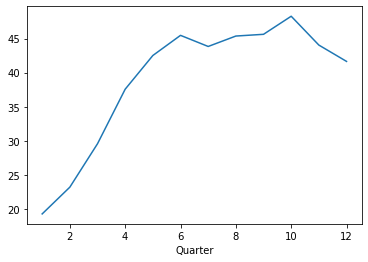

In [6]:
#create a data frame of those with Health Score above 3
healthy =df[df['Health Score'] <=3 ]
#group that by quarter
#count the unique employee id within that data frame
healthy_count_by_qt = healthy.groupby('Quarter').size()
#Calculate ratio of people getting sick by quarter
healthy_progression=healthy_count_by_qt/total_employees *100
healthy_progression.plot.line()
healthy_progression.head()

In [7]:
#plot healthy and sick progression on one plot
#put sick and healthy progression ratio series into data frame for plotting
healthy_progression=healthy_progression.to_frame(name='healthy_progression')
healthy_progression

,healthy_progression
Quarter,
1,19.266055
2,23.190622
3,29.561672
4,37.563710
5,42.507645
6,45.463812
7,43.832824
8,45.361876
9,45.616718


In [8]:
sick_progression=sick_progression.to_frame(name='sick_progression')
sick_progression

,sick_progression
Quarter,
1,15.596330
2,22.222222
3,28.491335
4,36.238532
5,42.660550
6,45.005097
7,50.458716
8,50.713558
9,51.936799


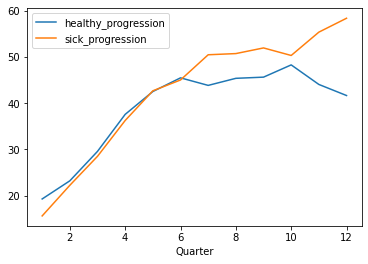

In [22]:
#create a plot with multiple lines
pd.merge(healthy_progression, sick_progression,on='Quarter').plot.line()

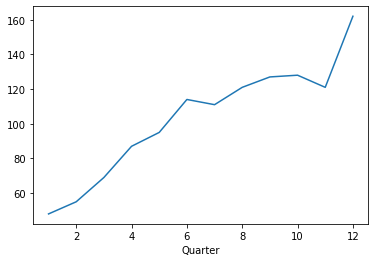

In [21]:
#Inspect the distribution of scores >6.0 in the dataset
dfnew=df[df['Health Score']>6]
dfnew.groupby('Quarter').size().plot()

In [19]:
#Inspect the distribution of scores <1.0 in the dataset
df[df['Health Score']<1].groupby('Quarter').size()

Quarter
2    1
3    1
4    2
5    1
6    1
7    3
8    1
9    1
dtype: int64